In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("lung cancer survey.csv")

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [5]:
df.shape

(309, 16)

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

<Axes: xlabel='SMOKING'>

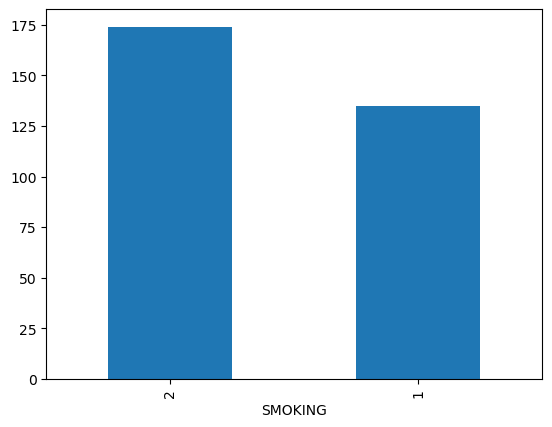

In [8]:
df['SMOKING'].value_counts().plot(kind="bar")

In [9]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [10]:
for i in df.columns:
    print(df[i].nunique())

2
39
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [11]:
y = df['LUNG_CANCER']

In [12]:
x = df.drop("LUNG_CANCER", axis = 1)

In [13]:
x.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [14]:
x['GENDER'] = pd.get_dummies(df['GENDER'], drop_first=True)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9)

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(x_train['AGE'].values.reshape(-1,1))

StandardScaler()

In [20]:
x_train['AGE'] = scaler.transform(x_train['AGE'].values.reshape(-1,1))
x_test['AGE'] = scaler.transform(x_test['AGE'].values.reshape(-1,1))

In [21]:
x_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
140,False,-1.876387,2,2,1,2,2,2,2,2,1,2,2,1,1
32,True,-0.800501,2,2,2,1,1,1,1,1,1,1,2,2,1
72,True,0.514470,1,1,1,1,2,2,2,2,2,2,2,1,2
285,False,-0.561416,2,2,2,2,1,2,1,1,1,2,2,2,1
256,True,-0.322330,2,1,1,1,1,2,2,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,False,0.992641,2,2,2,2,2,2,1,2,1,2,1,2,2
125,False,-1.159130,1,2,2,2,2,2,2,1,1,2,2,1,1
251,False,0.155841,2,2,2,2,2,2,2,2,1,2,2,2,2
56,False,0.036298,1,2,1,2,1,2,1,1,1,2,2,1,2


In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()

In [24]:
model.fit(x_train, y_train)

LogisticRegression()

In [25]:
y_pred = model.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
accuracy_score(y_pred, y_test)

0.9193548387096774

In [28]:
confusion_matrix(y_pred, y_test)

array([[ 7,  4],
       [ 1, 50]], dtype=int64)

In [29]:
import pickle

In [30]:
with open("lung_cancer_prediction.pkl", "wb") as file:
    pickle.dump(model, file)

In [31]:
with open ("lung_cancer_prediction.pkl", "rb") as file:
    pickle_model = pickle.load(file)

In [32]:
pickle_model.predict(x_test.iloc[:1,:])

array(['NO'], dtype=object)